***Participantes (RM - NOME):***<br>
Vitor Luiz Carvalhal - 337129<br>
Ricardo Fabbro Antonelli - 339505<br>
Bartira Lira Lafiandre - 340177<br>
Tiago Batista Pessoa - 339575<br>


## **0.Biblioteca e afins**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [3]:
!git clone https://github.com/bartiralira/bootcampIA.git

fatal: destination path 'bootcampIA' already exists and is not an empty directory.


# **Previsão semanal**

## **1.Importando os dados**

In [4]:
np.random.seed(7)

#Carrega o dataset
#international airline passengers problem with time step regression framing
dataframe_semana = read_csv('/content/bootcampIA/data/serie_temporal_semana.csv', engine='python', delimiter= ';')
dataframe_semana.head()

,Semana
20206,116
20207,151
20208,236
20209,145
202010,145


In [5]:
dataframe_semana = dataframe_semana.reset_index()
dataframe_semana = dataframe_semana.drop(columns=['index'])

In [6]:
dataframe_semana.head()

,Semana
0,116
1,151
2,236
3,145
4,145


## **2.Analisando os dados**

In [7]:
X = dataframe_semana.values
X = X.astype('float32')

In [8]:
dataframe_semana.describe()

,Semana
count,57.000000
mean,132.789474
std,57.775655
min,0.000000
25%,108.000000
50%,144.000000
75%,160.000000
max,288.000000


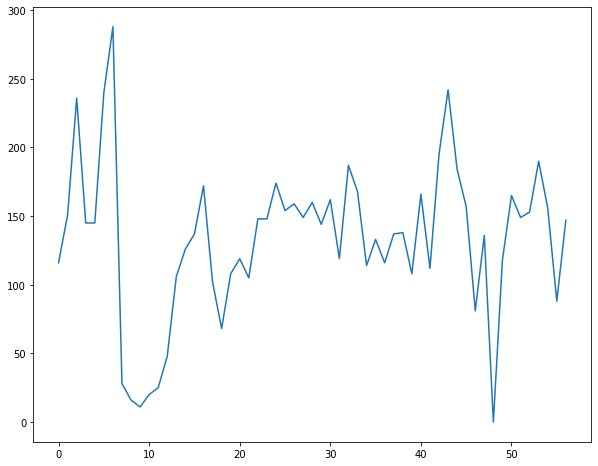

In [9]:
plt.figure(figsize=(10,8))
plt.plot(dataframe_semana)

In [10]:
X = X[25:len(X),:]

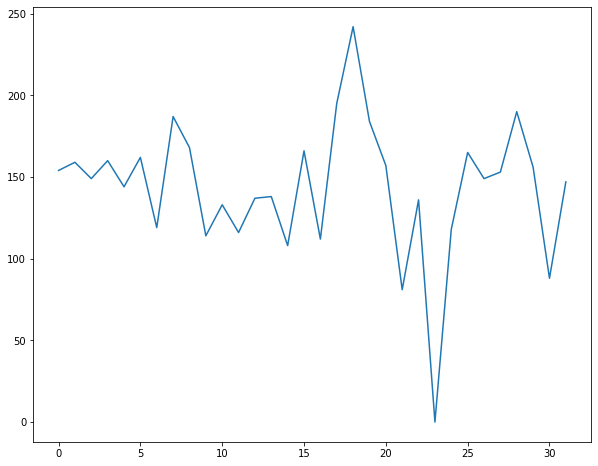

In [11]:
plt.figure(figsize=(10,8))
plt.plot(X)

In [12]:
#Normaliza o dataset
scaler = MinMaxScaler(feature_range=(0, 1))

#scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

train = X[0:train_size,:]
test =  X[train_size:len(X),:]

In [14]:
train.shape

(25, 1)

In [15]:
test.shape

(7, 1)

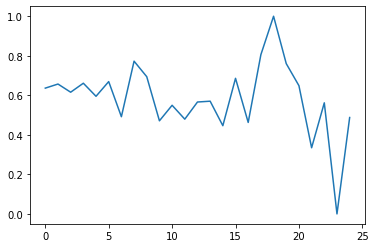

In [16]:
plt.plot(train)

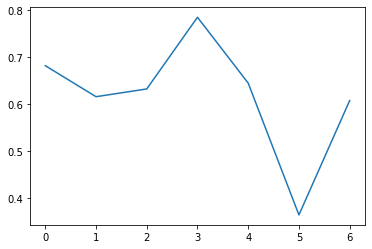

In [17]:
plt.plot(test)

In [18]:
# quantidade de atrasos
look_back = 1

X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [19]:
(X_train, x_valid) = X_train[100:], X_train[:100]
(y_train, y_valid) = y_train[100:], y_train[:100]

In [20]:
# quantidade de atrasos
look_back = 1

X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [21]:
X_train.shape

(23, 1)

In [22]:
# reshape da entrada para ser [amostras, time steps, caracteristicas]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))

In [23]:
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')
print(x_valid.shape, 'validation samples')

(23, 1, 1) train samples
(5, 1, 1) test samples
(23, 1, 1) validation samples


In [24]:
X_train[1]

array([[0.65702474]], dtype=float32)

In [25]:
y_train[1]

0.61570245

In [26]:
X_train.shape

(23, 1, 1)

## **3.Criando modelo RSTM**

In [27]:
from keras.callbacks import ModelCheckpoint

In [28]:
# Cria e treina a rede LSTM
model = Sequential()
model.add(LSTM(8, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adamax', metrics = ['mae'])
#model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

In [29]:
checkpointer = ModelCheckpoint(filepath='/content/bootcampIA/checkpoints/modelosemanal.hdf5', verbose=1,  save_best_only=True, monitor='val_mae') 

hist = model.fit(X_train, y_train, batch_size=1, epochs=100,validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/100
23/23 [==============================] - 2s 25ms/step - loss: 0.3848 - mae: 0.5914 - val_loss: 0.3594 - val_mae: 0.5710

Epoch 00001: val_mae improved from inf to 0.57097, saving model to /content/bootcampIA/checkpoints/modelosemanal.hdf5
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3413 - mae: 0.5556 - val_loss: 0.3215 - val_mae: 0.5397

Epoch 00002: val_mae improved from 0.57097 to 0.53968, saving model to /content/bootcampIA/checkpoints/modelosemanal.hdf5
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3052 - mae: 0.5259 - val_loss: 0.2858 - val_mae: 0.5083

Epoch 00003: val_mae improved from 0.53968 to 0.50828, saving model to /content/bootcampIA/checkpoints/modelosemanal.hdf5
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2709 - mae: 0.4947 - val_loss: 0.2545 - val_mae: 0.4789

Epoch 00004: val_mae improved from 0.50828 to 0.47887, saving model to /content/bootcampIA/checkpoints/modelo

## **4.Analisando as métricas**

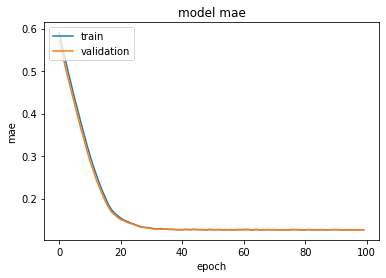

In [30]:
plt.figure(1)
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
model = load_model("/content/bootcampIA/checkpoints/modelosemanal.hdf5")

In [32]:
score = model.evaluate(X_train, y_train, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.12643073499202728


In [33]:
# Predições
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [34]:
# Faz a transformação inversa das predições
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [35]:
# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 44.43 RMSE
Test Score: 33.01 RMSE


In [36]:
# Prepara o vetor para plotagem do conjunto de treinamento
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back-1:len(trainPredict)+look_back-1, :] = trainPredict

In [37]:
# Prepara o vetor para plotagem do conjunto das predições
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(X)-2, :] = testPredict

## **5.Plotando resultados**

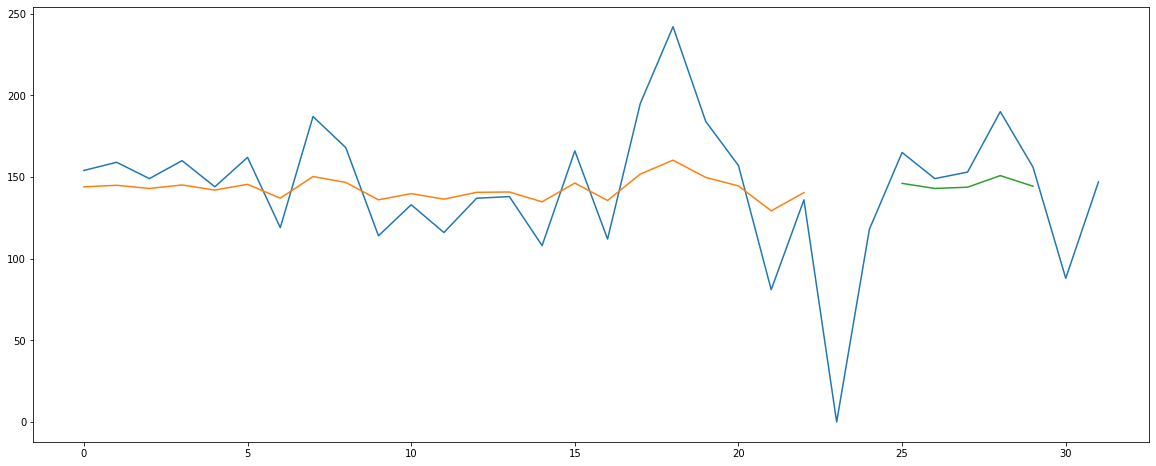

In [38]:
# Plota o dataset, as predições sobre o conjunto de treinamento e teste
plt.figure(figsize=(20,8))
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## **6.Conclusões**

Devido a baixa quantidade de dados realizar uma previsão semanal torna - se impreciso, assim não seria possível apenas com estes dados criar um modelo o qual entregue um insight aceitavel.